In [138]:
## Imporint Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [84]:
## Reading CSV file
df = pd.read_csv(r"C:\Users\Indirajith\OneDrive\Desktop\Internship\Advertising.csv")

### Exploratory Data Analysis

In [85]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [86]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [139]:
## Rename the column for better understanding
df.rename(columns = {'Unnamed: 0' : 'Index'}, inplace = True)

In [88]:
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [140]:
# Check information about the dataset, data types, and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [90]:
## Statistical Summary of the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [141]:
# Checking for missing values in the datset

df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Finding Outliers

<AxesSubplot:>

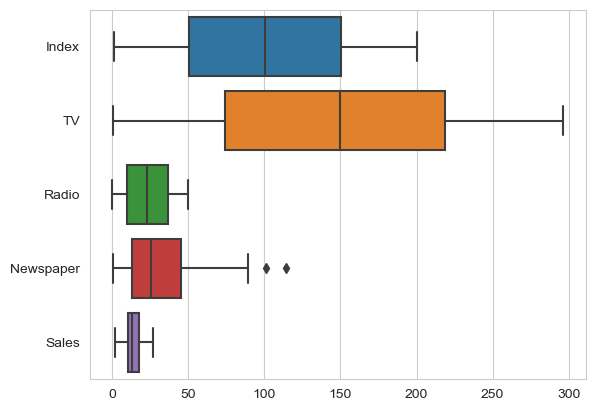

In [142]:
sns.boxplot(data=df,orient='h')

<AxesSubplot:>

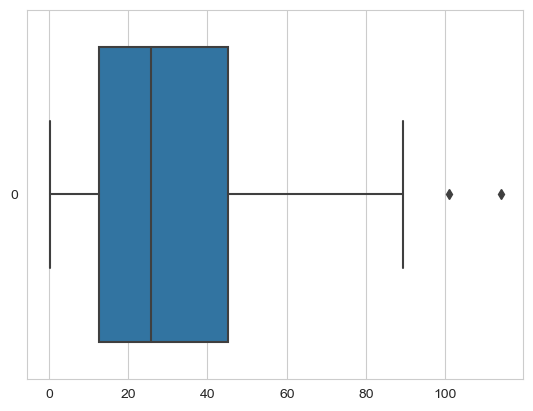

In [94]:
sns.boxplot(data=df['Newspaper'],orient='h')

### Removing Outliers Using IQR

In [95]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [96]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [97]:
df1 = df[(df >= lower_bound) & (df <= upper_bound) | df.isnull()]

In [98]:
df1.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [143]:
## checking missing values

df1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [144]:
## fill the null values with it's mean

df1['Newspaper'] = df1['Newspaper'].fillna(df1['Newspaper'].mean())

In [101]:
df1.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
## Removing unnecessary Columns permanaently

df1.drop('Index',axis=1,inplace=True)

In [103]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.042500,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.264000,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,29.777273,20.343298,0.3,12.750,25.75,43.550,89.4
Sales,200.0,14.022500,5.217457,1.6,10.375,12.90,17.400,27.0


<AxesSubplot:>

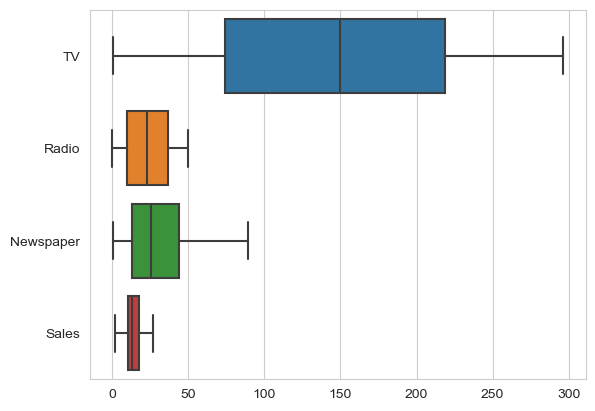

In [104]:
sns.boxplot(data=df1,orient='h')

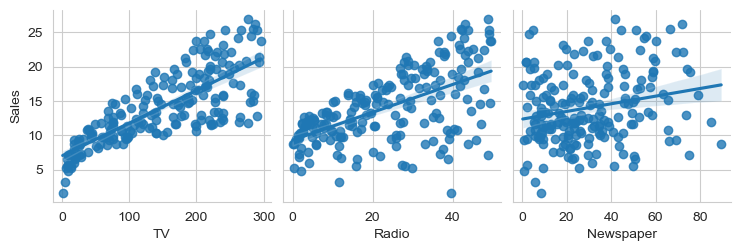

In [146]:
## Scatter plots to check the linearity assumption between each independent variable and dependent variables

sns.pairplot(df1, x_vars=["TV","Radio","Newspaper"], y_vars=["Sales"], kind="reg")

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

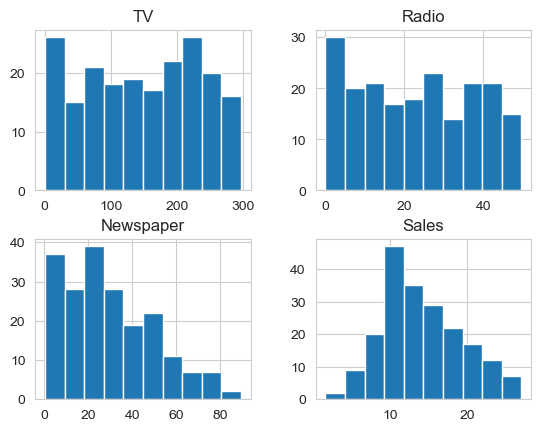

In [106]:
## Histograms to check the normality assumption of the dependent variable (Sales)

df1.hist(bins=10)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

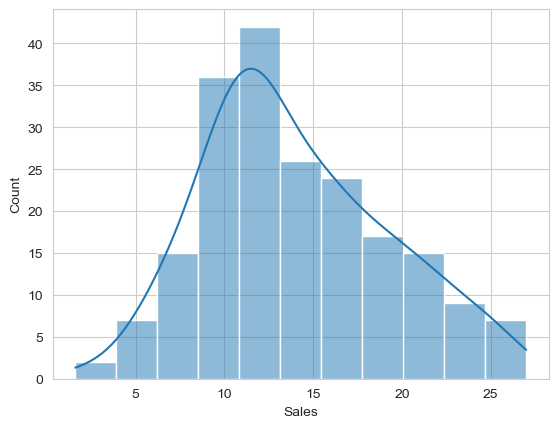

In [147]:
## To see how the data distributed

sns.histplot(df1['Sales'],kde='True')

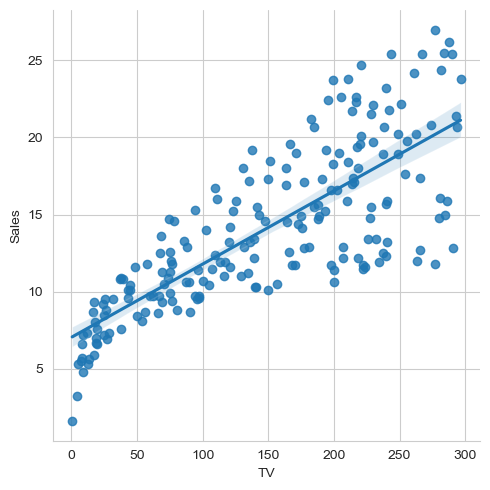

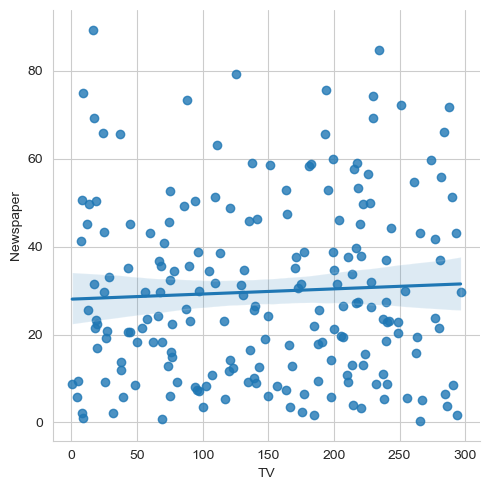

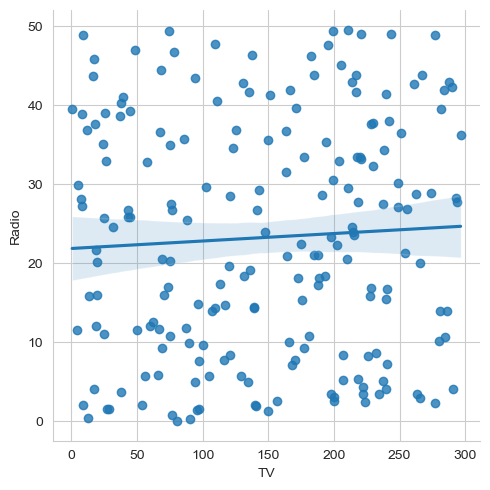

In [108]:
sns.lmplot(x='TV',y='Sales',data=df1)
sns.lmplot(x='TV',y='Newspaper',data=df1)
sns.lmplot(x='TV',y='Radio',data=df1)

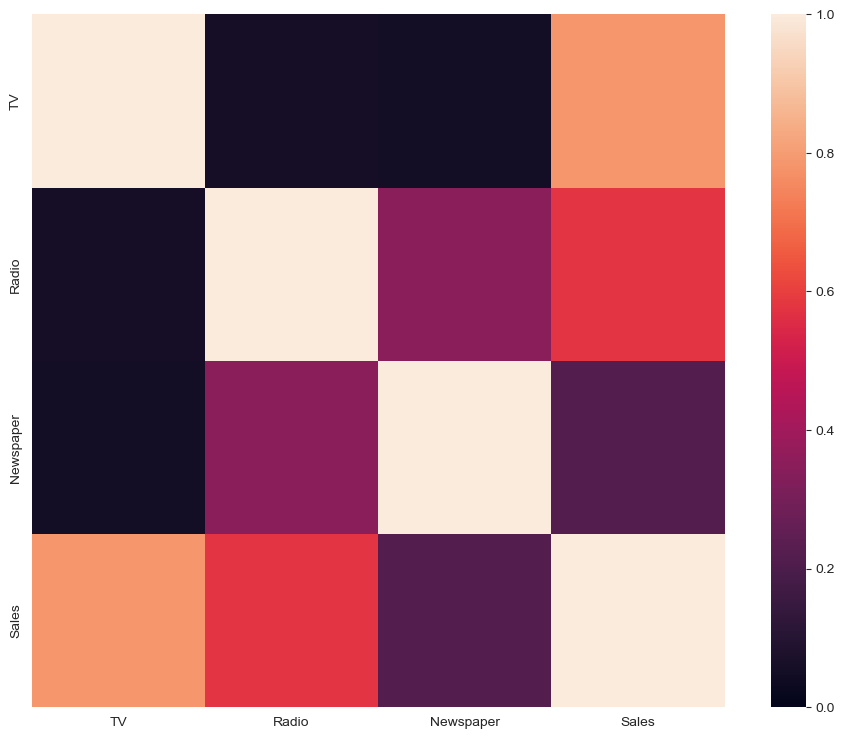

In [148]:
## To check Correlation between independent variables and dependent variables

corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, ax=ax)
plt.show()

In [149]:
## Model Preparation

X = df1.drop('Sales',axis=1)
Y = df1[["Sales"]]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=46)

In [150]:
## Linear regression model

linear_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df1 ).fit()

In [151]:
## Print the coeffiecints of the linear model

print(linear_model.params, "\n")

Intercept    2.942325
TV           0.045763
Radio        0.188556
Newspaper   -0.001194
dtype: float64 



In [113]:
## Print the summary of the linear regression model

print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.57e-96
Time:                        14:16:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9423      0.315      9.326      0.0

In [114]:
results = []
names = []

In [152]:
## list of models to evaluate

models = [('LinearRegression', LinearRegression())]

In [153]:
## Loop through each model, fit it to the data, and calculate the RMSE

for name, model in models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(Y_test,Y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.705751


### Make Prediction on New data

In [154]:
new_data = pd.DataFrame({'TV':[230.1],'Radio':[37.8], 'Newspaper': [69.2]})
predicted_sales = linear_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    20.517266
dtype: float64


In [155]:
new_data = pd.DataFrame({'TV':[500],'Radio':[250], 'Newspaper': [125]})
predicted_sales = linear_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    72.813762
dtype: float64
